In [2]:
import plotly.graph_objects as go
import plotly.express as px
import dash
from dash import dcc, html, Input, Output
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the two datasets for basic information

In [3]:
# Reading the two datasets for basic information

zomato_data = pd.read_csv('zomato_data.csv')
zomato_data.info()

zomato_country_data = pd.read_csv('zomato_country_data.csv')
zomato_country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [4]:
# Merge DataFrames
df_merged = pd.merge(zomato_data, zomato_country_data, how='left', on='Country Code')

# Display a few rows to verify the merge
print(df_merged.head())
print(df_merged.info())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

Adding a new column 'Converted Cost (INR)' for the Average cost of two in Indian currency

In [5]:
# Multiplying 'Exchange Rate' with average column for two for the converted cost
df_merged['Converted Cost (INR)'] = df_merged['Average Cost for two'] * df_merged['Exchange Rate']

# Displaying the final DataFrame with new columns
print(df_merged[['Country', 'Average Cost for two', 'Converted Cost (INR)']])

          Country  Average Cost for two  Converted Cost (INR)
0     Phillipines                  1100              1650.000
1     Phillipines                  1200              1800.000
2     Phillipines                  4000              6000.000
3     Phillipines                  1500              2250.000
4     Phillipines                  1500              2250.000
...           ...                   ...                   ...
9546       Turkey                    80               231.120
9547       Turkey                   105               303.345
9548       Turkey                   170               491.130
9549       Turkey                   120               346.680
9550       Turkey                    55               158.895

[9551 rows x 3 columns]


### Splitting the Cuisines since it has multiple values in a single cell

In [6]:
# Splitting the cuisines column into individual cuisines
df_merged['Cuisines'] = df_merged['Cuisines'].str.split(', ')

# Explode the lists to create a new row for each cuisine
df_exploded = df_merged.explode('Cuisines')

# Now you can use groupby to get counts for each cuisine
cuisine_counts = df_exploded['Cuisines'].value_counts()

# Print the counts
print(cuisine_counts)
print(df_exploded.head())
print(df_exploded.info())

Cuisines
North Indian      3960
Chinese           2735
Fast Food         1986
Mughlai            995
Italian            764
                  ... 
Fish and Chips       1
Malwani              1
Cuisine Varies       1
Soul Food            1
B韄rek                1
Name: count, Length: 145, dtype: int64
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
0        6317637        Le Petit Souffle           162       Makati City   
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
0  Third Floor, Century City Mall, Kalayaan Avenu...   
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2

### Saving the new dataframe in an updated file

In [7]:
df_exploded.info()
df_exploded.to_csv('zomato_data_updated.csv')

<class 'pandas.core.frame.DataFrame'>
Index: 19719 entries, 0 to 9550
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         19719 non-null  int64  
 1   Restaurant Name       19719 non-null  object 
 2   Country Code          19719 non-null  int64  
 3   City                  19719 non-null  object 
 4   Address               19719 non-null  object 
 5   Locality              19719 non-null  object 
 6   Locality Verbose      19719 non-null  object 
 7   Longitude             19719 non-null  float64
 8   Latitude              19719 non-null  float64
 9   Cuisines              19710 non-null  object 
 10  Average Cost for two  19719 non-null  int64  
 11  Currency              19719 non-null  object 
 12  Has Table booking     19719 non-null  object 
 13  Has Online delivery   19719 non-null  object 
 14  Is delivering now     19719 non-null  object 
 15  Switch to order menu  197

## Exploratory Data Analysis

### Displaying basic statistics of the columns

In [8]:
df = pd.read_csv('zomato_data_updated.csv')

# Display basic statistics of the numerical columns
print(df.describe())

# Display information about the dataset
print(df.info())

         Unnamed: 0  Restaurant ID  Country Code     Longitude      Latitude  \
count  19719.000000   1.971900e+04  19719.000000  19719.000000  19719.000000   
mean    4683.712105   8.703133e+06     18.635225     64.451944     25.685358   
std     2784.069067   8.768442e+06     57.138021     41.033794     11.030313   
min        0.000000   5.300000e+01      1.000000   -157.948486    -41.330428   
25%     2289.500000   3.009605e+05      1.000000     77.080235     28.470010   
50%     4597.000000   3.500017e+06      1.000000     77.190886     28.567751   
75%     7069.000000   1.833446e+07      1.000000     77.280694     28.640968   
max     9550.000000   1.850065e+07    216.000000    174.832089     55.976980   

       Average Cost for two   Price range  Aggregate rating         Votes  \
count          19719.000000  19719.000000      19719.000000  19719.000000   
mean            1313.034383      1.954815          2.866504    198.667884   
std            16709.032220      0.920811       

### Univariate analysis

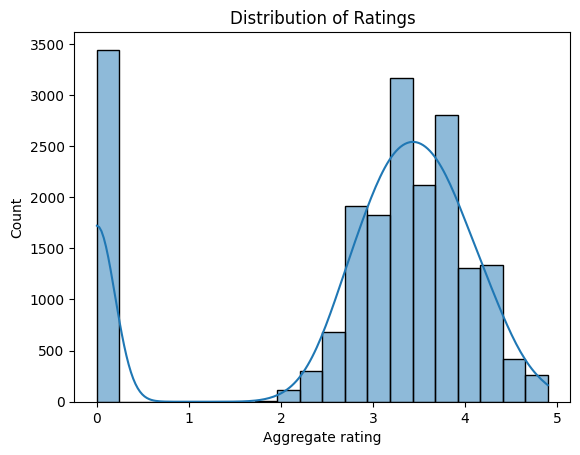

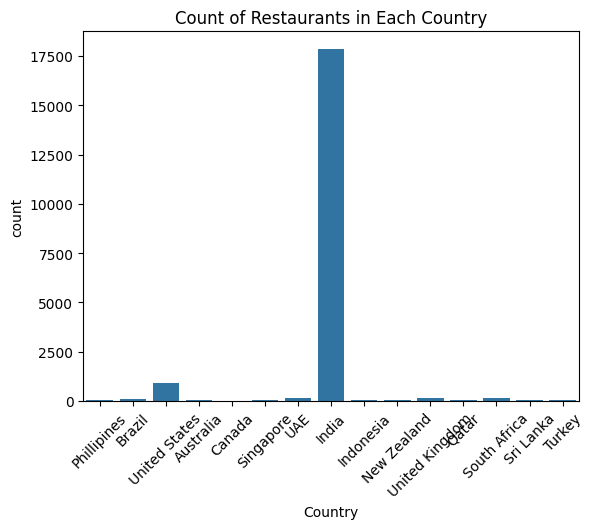

In [9]:
# Distribution of Ratings
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.show()

# Count of restaurants in each country
sns.countplot(x='Country', data=df)
plt.title('Count of Restaurants in Each Country')
plt.xticks(rotation=45)
plt.show()

### Bivariate Analysis

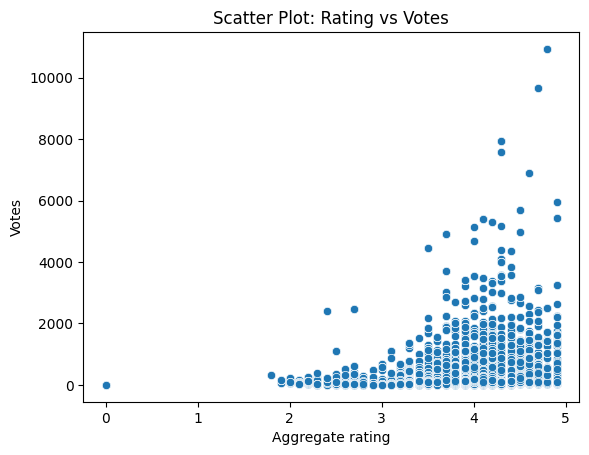

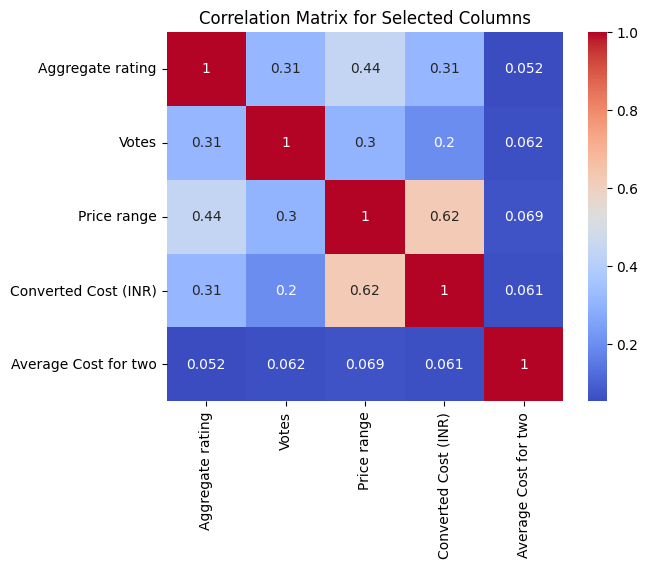

In [10]:
# Scatter plot between Rating and Votes
sns.scatterplot(x='Aggregate rating', y='Votes', data=df)
plt.title('Scatter Plot: Rating vs Votes')
plt.show()

# Specify the columns you want to include in correlation analysis
selected_columns = ['Aggregate rating', 'Votes', 'Price range', 'Converted Cost (INR)', 'Average Cost for two']

# Select only the specified columns
selected_data = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Selected Columns')
plt.show()

### Categorical Variables

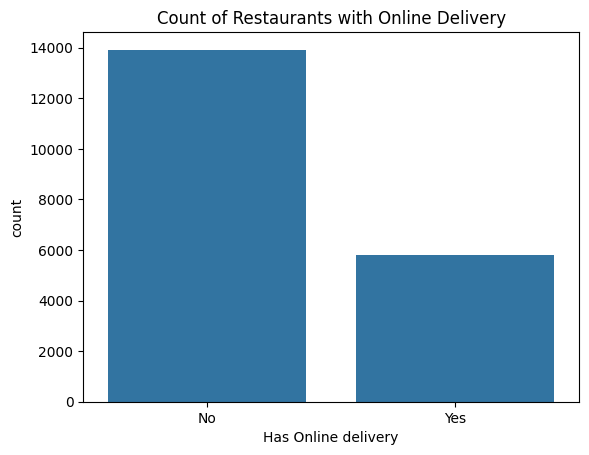

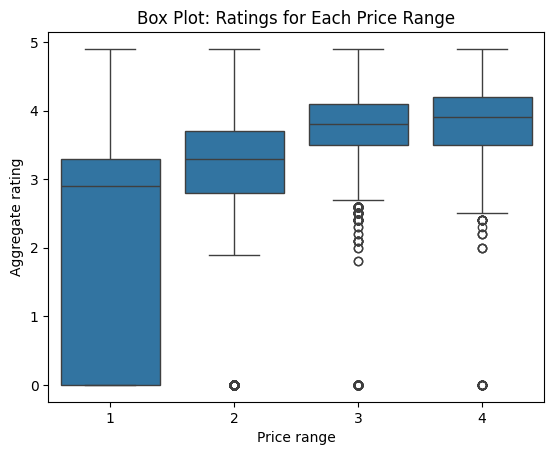

In [11]:
# Count of restaurants with online delivery
sns.countplot(x='Has Online delivery', data=df)
plt.title('Count of Restaurants with Online Delivery')
plt.show()

# Box plot of Ratings for each Price Range
sns.boxplot(x='Price range', y='Aggregate rating', data=df)
plt.title('Box Plot: Ratings for Each Price Range')
plt.show()


### Checking for outliers

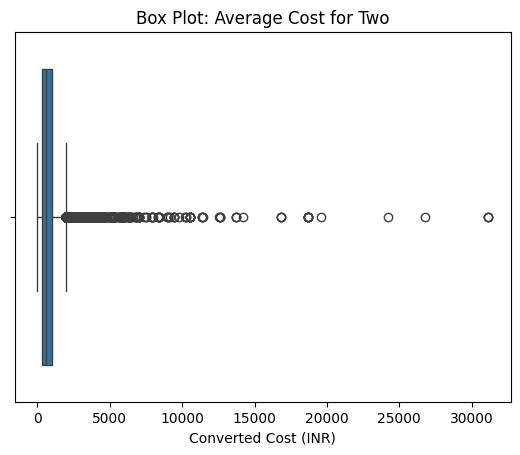

In [12]:
# Example: Check for outliers in 'Average Cost for two'
sns.boxplot(x=df['Converted Cost (INR)'])
plt.title('Box Plot: Average Cost for Two')
plt.show()

## Country based data analysis

In [13]:
# Create Dash app
app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    html.H1("Restaurant Analysis Dashboard"),

    # Dropdown for country selection
    dcc.Dropdown(
        id='country-dropdown',
        options=[{'label': country, 'value': country} for country in df['Country'].unique()],
        value='India',
        multi=False,
        style={'width': '50%'}
    ),

    # Cuisine Analysis
    dcc.Graph(id='cuisine-analysis'),

    # Ratings Analysis
    dcc.Graph(id='ratings-analysis'),

    # Delivery Services
    dcc.Graph(id='delivery-services'),

    # Cost Analysis
    dcc.Graph(id='cost-analysis'),

    # Display the most costly cuisine
    html.Div(id='most-costly-cuisine', style={'margin-top': '20px', 'font-size': '18px'})
])

# Callback to update graphs and display the most costly cuisine based on user input
@app.callback(
    [Output('cuisine-analysis', 'figure'),
     Output('ratings-analysis', 'figure'),
     Output('delivery-services', 'figure'),
     Output('cost-analysis', 'figure'),
     Output('most-costly-cuisine', 'children')],
    [Input('country-dropdown', 'value')]
)
def update_graphs(selected_country):
    # Filter DataFrame based on user input
    filtered_df = df[df['Country'] == selected_country]

    # Cuisine Analysis
    fig_cuisine = px.bar(filtered_df, x='Cuisines', title='Cuisine Analysis')

    # Ratings Analysis - Restaurant-wise
    fig_ratings = px.bar(filtered_df, x='Restaurant Name', y='Aggregate rating', title='Ratings Analysis')

    # Delivery Services
    fig_delivery = px.pie(filtered_df.drop_duplicates(subset=['Restaurant ID']), names='Has Online delivery', title='Delivery Services')
    
    # Cost Analysis using Converted Cost (INR)
    fig_cost = px.box(filtered_df.groupby('Cuisines').agg({'Converted Cost (INR)': 'mean'}).reset_index(), x='Cuisines', y='Converted Cost (INR)', title='Cost Analysis')

    # Find the most costly cuisine
    most_costly_cuisine = filtered_df.groupby('Cuisines')['Converted Cost (INR)'].mean().idxmax()

    return fig_cuisine, fig_ratings, fig_delivery, fig_cost, f'The most costly cuisine is "{most_costly_cuisine}"'
    

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

## City based Analysis

In [14]:
# Create Dash app
app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    html.H1("City Analysis Dashboard"),

    # Dropdown for country selection
    dcc.Dropdown(
        id='country-dropdown',
        options=[{'label': country, 'value': country} for country in df['Country'].unique()],
        value='India',
        multi=False,
        style={'width': '50%'}
    ),

    # Dropdown for city selection
    dcc.Dropdown(
        id='city-dropdown',
        multi=False,
        style={'width': '50%'}
    ),

    # Famous Cuisine in the City
    dcc.Graph(id='famous-cuisine'),

    # Costlier Cuisine in the City
    dcc.Graph(id='costlier-cuisine'),

    # Rating Count in the City
    dcc.Graph(id='rating-count'),

    # Pie Chart Online Delivery vs Dine-In
    dcc.Graph(id='delivery-mode')
])

# Callback to update city dropdown based on country selection
@app.callback(
    Output('city-dropdown', 'options'),
    [Input('country-dropdown', 'value')]
)
def update_cities(selected_country):
    cities = df[df['Country'] == selected_country]['City'].unique()
    city_options = [{'label': city, 'value': city} for city in cities]
    return city_options

# Callback to update graphs based on user input
@app.callback(
    [Output('famous-cuisine', 'figure'),
     Output('costlier-cuisine', 'figure'),
     Output('rating-count', 'figure'),
     Output('delivery-mode', 'figure')],
    [Input('country-dropdown', 'value'),
     Input('city-dropdown', 'value')]
)
def update_city_graphs(selected_country, selected_city):
    # Filter DataFrame based on user input
    filtered_df = df[(df['Country'] == selected_country) & (df['City'] == selected_city)]

    # Famous Cuisine in the City
    fig_famous_cuisine = px.bar(
        filtered_df['Cuisines'].value_counts().nlargest(10).reset_index(),
        x='Cuisines',  # 'index' is the column name created by reset_index() for cuisine names
        y='count',  # Number of occurrences
        title='Famous Cuisine in the City',
        labels={'index': 'Cuisine', 'Cuisines': 'Number of Occurrences'}
    )


    # Costlier Cuisine in the City
    fig_costlier_cuisine = px.box(filtered_df.groupby('Cuisines').agg({'Converted Cost (INR)': 'mean'}).reset_index(), x='Cuisines', y='Converted Cost (INR)', title='Costlier Cuisine in the City')

    
    # Rating Count in the City
    fig_rating_count = px.bar(filtered_df, x='Cuisines', y='Votes', title='Rating Count in the City', color='Aggregate rating')

    # Pie Chart Online Delivery vs Dine-In
    fig_delivery_mode = px.pie(filtered_df, names='Has Online delivery', title='Delivery Mode in the City')

    return fig_famous_cuisine, fig_costlier_cuisine, fig_rating_count, fig_delivery_mode

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)



In [15]:
pip install nbformat>=4.2.0


Note: you may need to restart the kernel to use updated packages.


## City comparison within India

In [16]:
# Filter data for India
india_df = df[df['Country'] == 'India']

# Report 1: Comparison Between Cities in India
fig_cities = px.bar(india_df.groupby('City').size().reset_index(), x='City', y=0, title='Number of Restaurants per City')

# Report 2: Online Delivery Expenses in Different Cities
fig_online_delivery = px.bar(
    india_df.groupby(['City', 'Has Online delivery']).size().reset_index(),
    x='City', y=0, color='Has Online delivery', 
    title='Online Delivery Expenses in Different Cities'
)

# Report 3: Dine-In Expenses in Different Cities
fig_dine_in = px.bar(
    india_df.groupby(['City', 'Has Table booking']).size().reset_index(),
    x='City', y=0, color='Has Table booking',
    title='Dine-In Expenses in Different Cities'
)


# Report 4: High Living Cost vs. Low Living Cost
fig_cost_cities = px.bar(
    india_df.groupby('City')['Average Cost for two'].mean().reset_index(),
    x='City', y='Average Cost for two',
    title='Average Cost for Two in Different Cities'
)


# Show the figures
fig_cities.show()
fig_online_delivery.show()
fig_dine_in.show()
fig_cost_cities.show()
